In [122]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')


In [16]:
ampg=pd.read_csv('autompg.csv',header=None,sep="\s+")

In [17]:
ampg.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','carname']

In [18]:
ampg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [20]:
ampg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
carname          object
dtype: object

In [21]:
ampg.columns.value_counts()

model_year      1
horsepower      1
acceleration    1
mpg             1
displacement    1
carname         1
weight          1
origin          1
cylinders       1
dtype: int64

In [22]:
ampg.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
carname         305
dtype: int64

In [23]:
for cols in ampg.columns.values:
    print(ampg[cols].unique())

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
[8 4 6 3 5]
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  115.  10

In [25]:
#Checking for null values

ampg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
carname         0
dtype: int64

In [27]:
#checking for missing values and replacing with nan values

ampg=ampg.replace('?',np.nan)

In [28]:
ampg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
carname         0
dtype: int64

it seems there are missing values in one column, lets impute the values



In [29]:
ampg['horsepower'].fillna(ampg['horsepower'].mode()[0],inplace=True)
ampg['horsepower']=ampg['horsepower'].astype(float)

In [30]:
ampg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
carname         0
dtype: int64

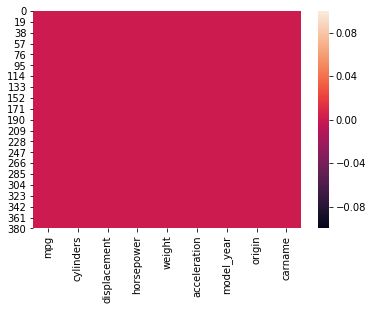

In [31]:
sbn.heatmap(ampg.isnull())

In [32]:
ampg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.753177,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,-0.454271
weight,-0.831741,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.454271,-0.581024,0.205873,0.180662,1.000000


In [33]:
ampg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


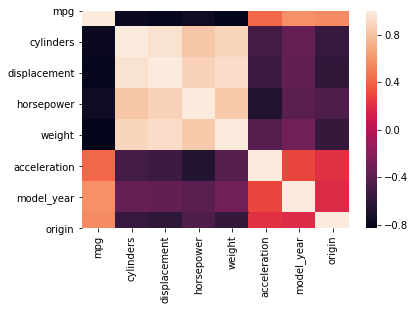

In [34]:
sbn.heatmap(ampg.corr())

In [35]:
ampg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [36]:
#Dropping carname column since it is not helpful 

ampg=ampg.drop(['carname'],axis=1)

In [37]:
ampg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
225,17.5,6,250.0,110.0,3520.0,16.4,77,1
90,12.0,8,429.0,198.0,4952.0,11.5,73,1
332,29.8,4,89.0,62.0,1845.0,15.3,80,2
144,31.0,4,76.0,52.0,1649.0,16.5,74,3
386,25.0,6,181.0,110.0,2945.0,16.4,82,1


In [39]:
ampg.groupby(['cylinders','horsepower'])['mpg'].max()

cylinders  horsepower
3          90.0          18.0
           97.0          19.0
           100.0         23.7
           110.0         21.5
4          46.0          26.0
                         ... 
8          210.0         11.0
           215.0         14.0
           220.0         14.0
           225.0         14.0
           230.0         16.0
Name: mpg, Length: 121, dtype: float64

As the horsepower and cylinders increases, mpg decreases

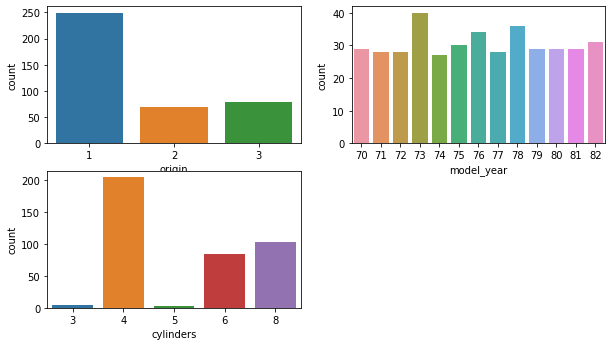

In [48]:
column=ampg[['origin','model_year','cylinders',]]
plt.figure(figsize=(10,60))
for col_in,col in enumerate(column.columns):
    plt.subplot(20,2,col_in+1)
    sbn.countplot(x=column[col],data=column)
    

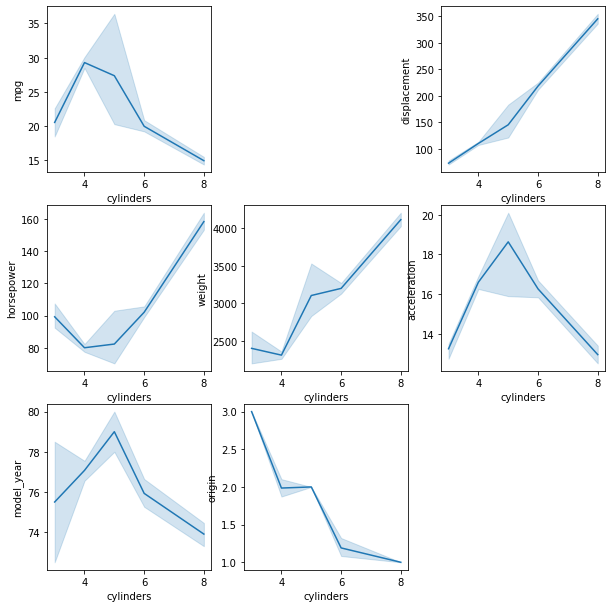

In [58]:
#Visualizing the relation between multiple columns with respect to cylinders

plt.figure(figsize=(10,25))
for col_in,col in enumerate(ampg.columns):
    if col=='cylinders':
        continue
    plt.subplot(7,3,col_in+1)
    sbn.lineplot(x='cylinders',y=col,data=ampg)


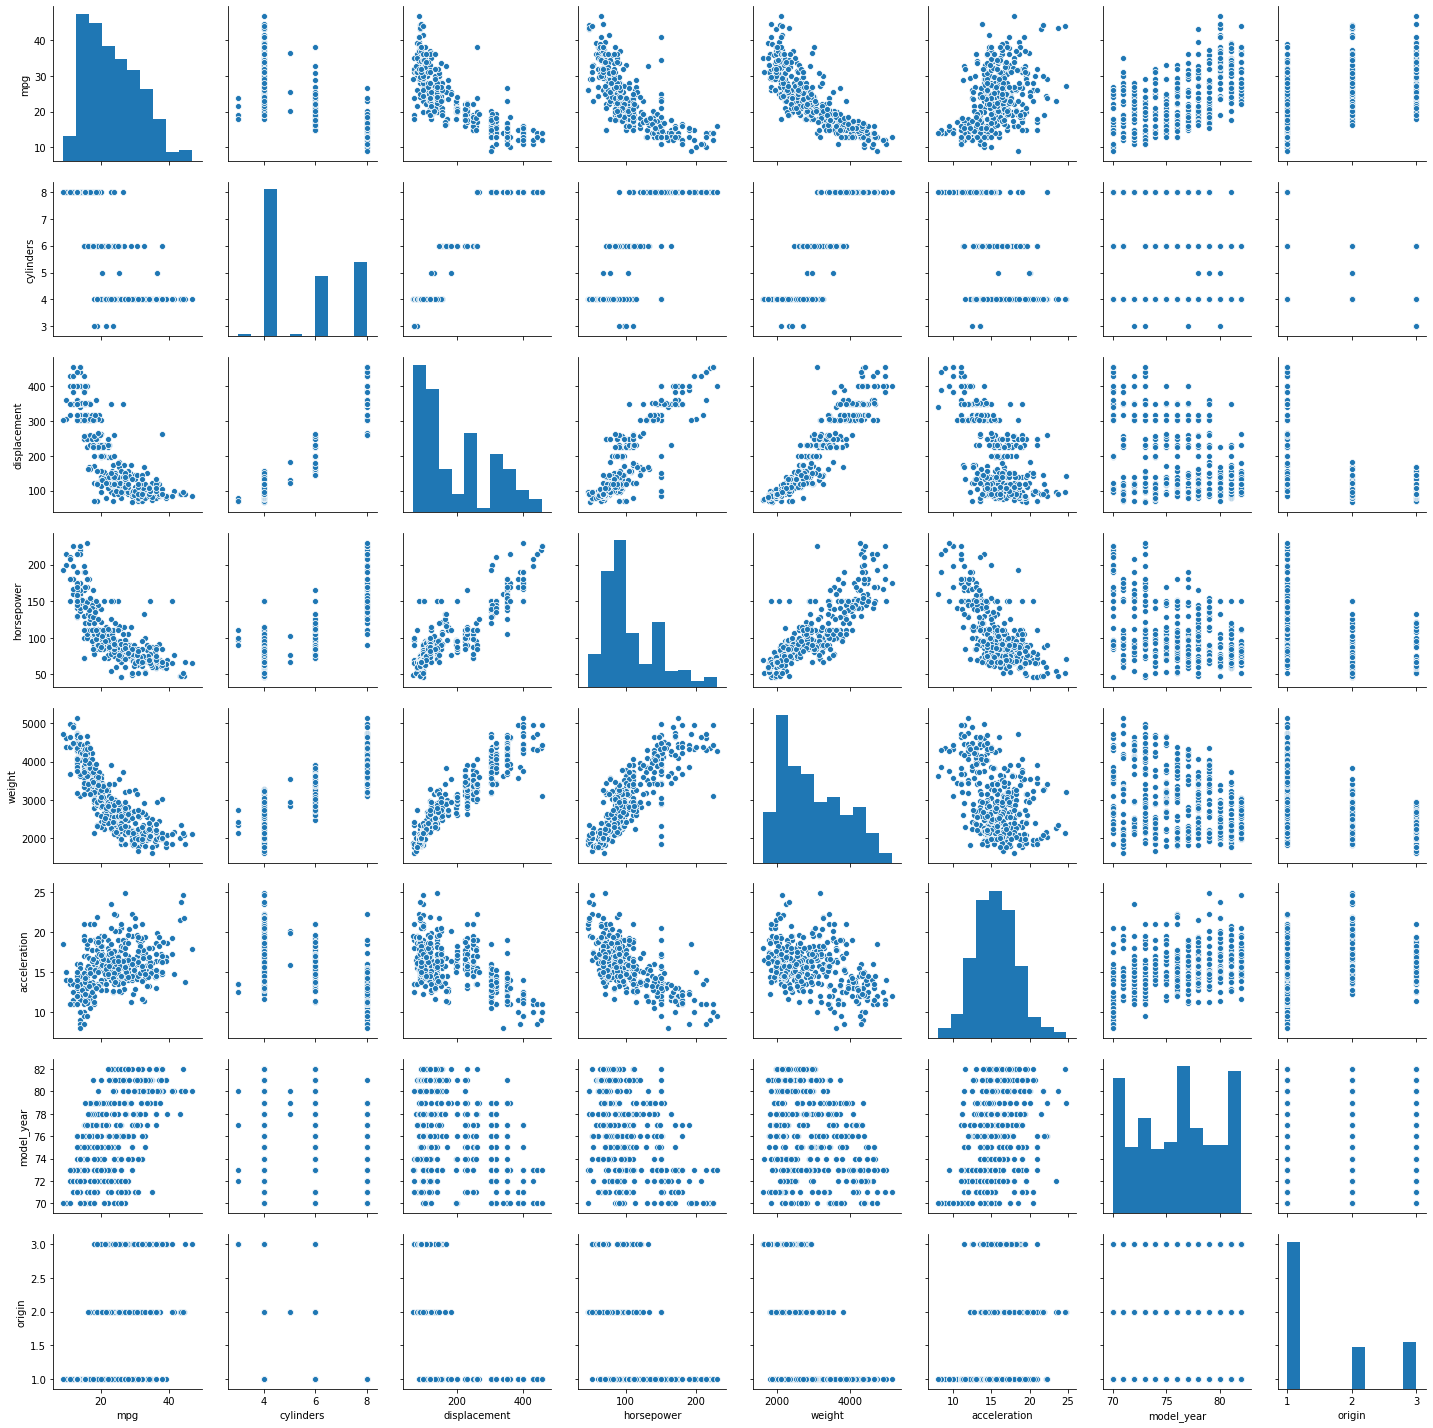

In [55]:
sbn.pairplot(ampg)

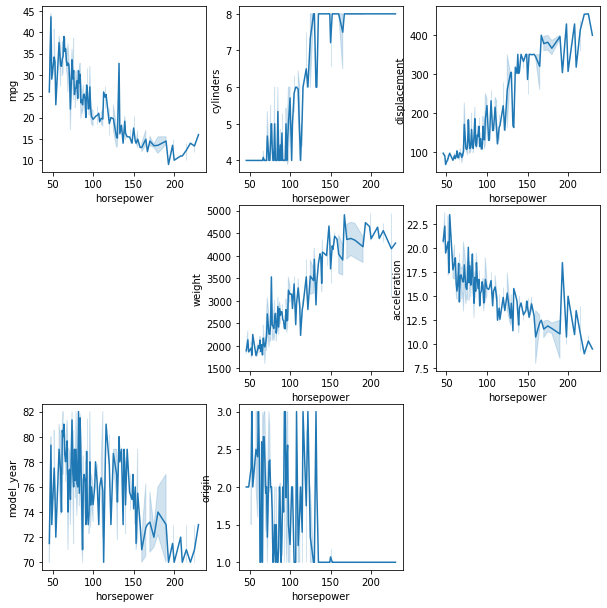

In [59]:
#Visualizing the relation between multiple columns with respect to horsepower

plt.figure(figsize=(10,25))
for col_in,col in enumerate(ampg.columns):
    if col=='horsepower':
        continue
    plt.subplot(7,3,col_in+1)
    sbn.lineplot(x='horsepower',y=col,data=ampg)

In [60]:
#Data Preprocessing

#Checking skewness and scaling

ampg.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.033003
weight          0.531063
acceleration    0.278777
model_year      0.011535
origin          0.923776
dtype: float64

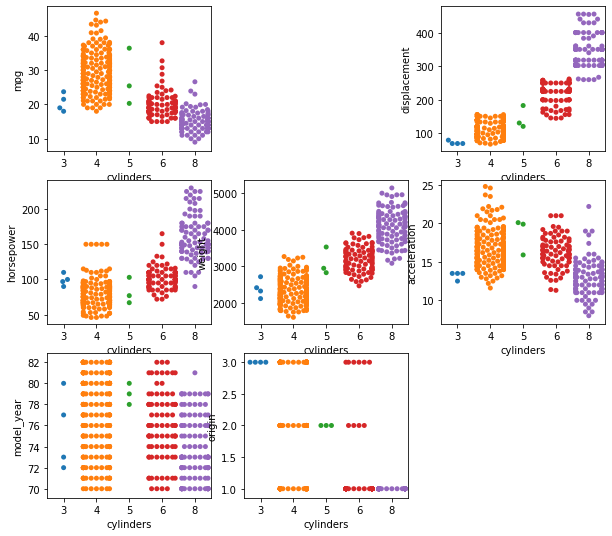

In [81]:
plt.figure(figsize=(10,25))
for col,ind in enumerate(ampg.columns):
    if ind=='cylinders':
        continue
    plt.subplot(8,3,col+1)
    
    sbn.swarmplot(x='cylinders',y=ind,data=ampg)

In [96]:
#Treating skewness
for col in ampg.columns:
    if ampg.skew().loc[col]>0.55:
        ampg[col]=np.power(ampg[col],1/3)
ampg.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.469855
horsepower      0.451940
weight          0.531063
acceleration    0.278777
model_year      0.011535
origin          0.736731
dtype: float64

In [97]:
#Seperating the feature set and label

x=ampg.drop(['mpg'],axis=1)
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,17.521415,2.250733,3504.0,12.0,70,1.0
1,8,18.708287,2.341966,3693.0,11.5,70,1.0
2,8,17.832555,2.305058,3436.0,11.0,70,1.0
3,8,17.435596,2.305058,3433.0,12.0,70,1.0
4,8,17.378147,2.278704,3449.0,10.5,70,1.0


In [99]:
y=ampg['mpg']

In [105]:
#Scaling the features

scaler=StandardScaler()
x=scaler.fit_transform(x)

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [111]:
models=[('LinearRegression',LinearRegression()),('KNeighborsRegression',KNeighborsRegressor()),('Lasso',Lasso()),('Ridge',Ridge()),('RandomForestRegressor',RandomForestRegressor()),('Elasticnet',ElasticNet()),('Gradientboostingregressor',GradientBoostingRegressor())]

In [115]:
#Finding the best fit and random state
Model=[]
Random_state=[]
max_R2_score=[]
for name,model in models:
    max_r2s=0
    for rst in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rst,test_size=.22)
        model.fit(x_train,y_train)
        predy=model.predict(x_test)
        r2s=r2_score(y_test,predy)
        if r2s>max_r2s:
            max_r2s=r2s
            frst=rst
    Model.append(name)
    Random_state.append(frst)
    max_R2_score.append(r2s)
        

In [117]:
#Viewing all model perrformances

m_performance=pd.DataFrame({'Model':Model,'R2_Score':max_R2_score,'Random_State':Random_state})
m_performance

,Model,R2_Score,Random_State
0,LinearRegression,0.786217,91
1,KNeighborsRegression,0.853558,72
2,Lasso,0.755064,91
3,Ridge,0.786983,91
4,RandomForestRegressor,0.802445,91
5,Elasticnet,0.758691,42
6,Gradientboostingregressor,0.855463,91


In [118]:
m_performance.sort_values('R2_Score')

,Model,R2_Score,Random_State
2,Lasso,0.755064,91
5,Elasticnet,0.758691,42
0,LinearRegression,0.786217,91
3,Ridge,0.786983,91
4,RandomForestRegressor,0.802445,91
1,KNeighborsRegression,0.853558,72
6,Gradientboostingregressor,0.855463,91


In [125]:
#Cross validation of all the models

cross_val_sc=[]
sd=[]
for name,model in models:
    cvs=cross_val_score(model,x,y,cv=kf,scoring='r2')
    cross_val_sc.append(cvs.mean())

In [127]:
#listing cross validation

c_performance=pd.DataFrame({'Model':Model,'Cross val score':cross_val_sc})

In [128]:
c_performance

,Model,Cross val score
0,LinearRegression,0.622569
1,KNeighborsRegression,0.703538
2,Lasso,0.573155
3,Ridge,0.623249
4,RandomForestRegressor,0.730338
5,Elasticnet,0.545060
6,Gradientboostingregressor,0.742696


In [129]:
c_performance.sort_values('Cross val score')

,Model,Cross val score
5,Elasticnet,0.545060
2,Lasso,0.573155
0,LinearRegression,0.622569
3,Ridge,0.623249
1,KNeighborsRegression,0.703538
4,RandomForestRegressor,0.730338
6,Gradientboostingregressor,0.742696


In [130]:
#tuning parameters to impove the model accuracy of GradientBoostingRegressor

parameters={'max_depth':[2,4,5],'max_features':['auto','sqrt'],'n_estimators':[50,100,300]}
gbr=GradientBoostingRegressor()
gsr=GridSearchCV(gbr,parameters)
gsr.fit(x_train,y_train)
gsr.best_params_

{'max_depth': 2, 'max_features': 'auto', 'n_estimators': 100}

In [131]:
gsr.best_score_

0.8730533756196055

In [ ]:
#Fitting best model

In [132]:
gsr.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=91)
gbre=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
kfl=KFold(n_splits=10,random_state=5)
gbre.fit(x_train,y_train)
gbp=gbre.predict(x_test)
cvs=cross_val_score(gbre,x,y,cv=kfl,scoring='r2')
print('r2 score is ',r2_score(y_test,gbp))
print('mean absolute error',mean_absolute_error(y_test,gbp))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,gbp)))
print('Mean cross validation score',cvs.mean())


r2 score is  0.9360654428892641
mean absolute error 1.495058516117524
Root mean squared error 1.882751450611927
Mean cross validation score 0.7466353342713694


In [136]:
#Saving predictions

prdc=pd.DataFrame(gbp,columns=['mpg'])
prdc.to_csv('mpgpredctions.csv')

In [137]:
#Saving model

joblib.dump(gbre,'mpgpredict.pkl')

['mpgpredict.pkl']